<h1>Prediction of customer churn in a telecommunications company

In [444]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [445]:
df = pd.read_csv(r'C:\Users\lour2\Desktop\LOURDES\data science\Proyecto Machine Learning\data\raw\IBM_CHURN.csv', index_col = 'Unnamed: 0')

#### About the dataset:

Each row represents a customer, each column contains customer’s attributes described as follows:
- CustomerID : customer identification number
- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not in the last month (Yes or No)



<h3> 1. Let's load the Dataset and take an overview of it

In [446]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Reason
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,NaN
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved


In [447]:
df.shape

(7043, 22)

Changing the order of the columns , and placing Churn at the end

In [448]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn Reason'],
      dtype='object')

In [449]:
orden =['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn Reason',
       'Churn']
df = df[orden]

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

In [451]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convert Dtypes

In [452]:
#TotalCharges is a numerical feature, but it's read as object
mask = df[df['TotalCharges'] == ' ']
mask_index = mask.index
df.loc[mask_index, 'TotalCharges'] = 0


In [453]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

<h3> 2. Missing values

The only column with Nan values is 'Churn Reason', let's see how to solve it

In [454]:
# checking the percentage of Nan in the column
df['Churn Reason'].isna().sum()*100/len(df['Churn Reason'])

73.46301292063042

In [455]:
# the percentage of Nan is very high so we drop the column
df = df.drop('Churn Reason', axis=1)

<h3> 3. Univariate analysis

Let's check if the target ('Churn') is balanced

In [456]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [457]:
sns.countplot??

Signature:
sns.countplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    stat='count',
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.

Note that :func:`histplot` function offers similar functionality with additional
features (e.g. bar stacking), although its default behavior is somewhat different.

See the :ref:`tutorial <categorical_tutorial>` for more information.

.. note::
    By default, this function treats one of the 

<Axes: xlabel='Churn', ylabel='count'>

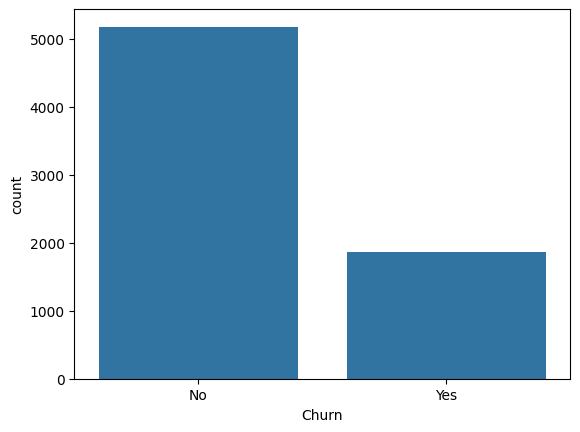

In [458]:
sns.countplot(x="Churn", data=df)

We see it is highly unbalanced, we will have to use the appropriate metric (precision , f1-score)

Now let's take a look to the other main variables

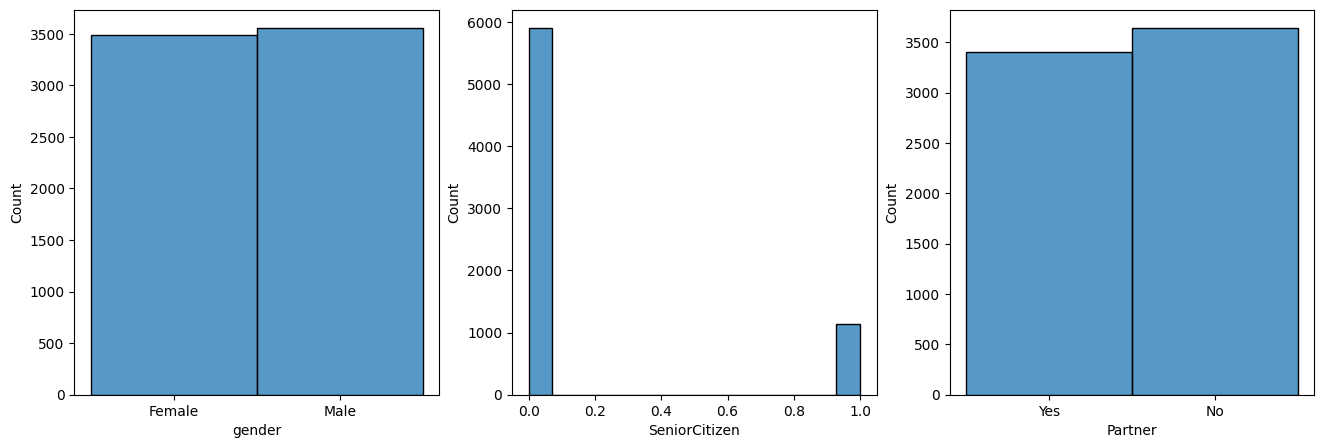

In [459]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['gender'], ax=axes[0])
sns.histplot(df['SeniorCitizen'], ax=axes[1])
sns.histplot(df['Partner'], ax=axes[2]);

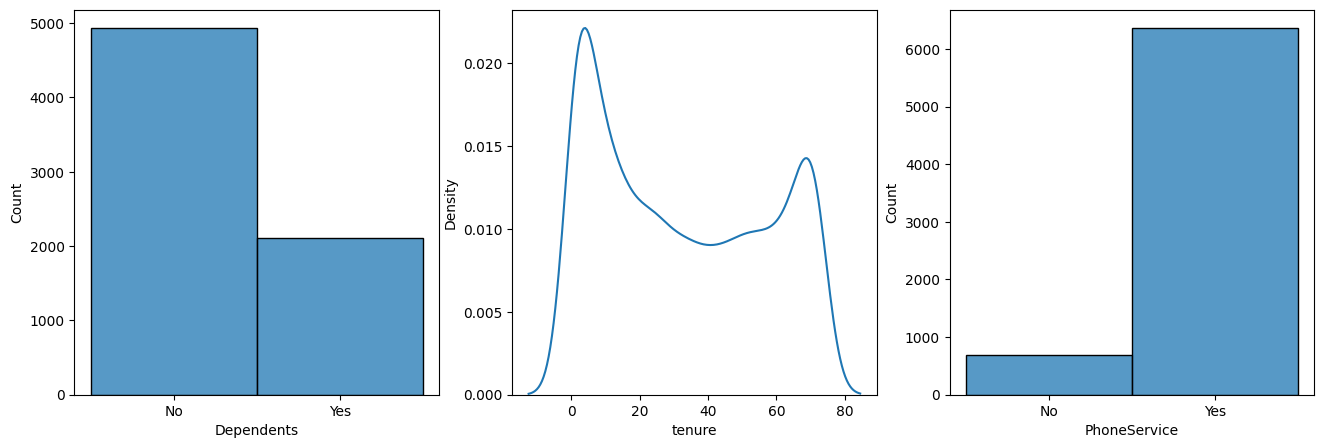

In [460]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['Dependents'], ax=axes[0])
sns.kdeplot(data = df['tenure'], ax=axes[1])
sns.histplot(df['PhoneService'], ax=axes[2]);

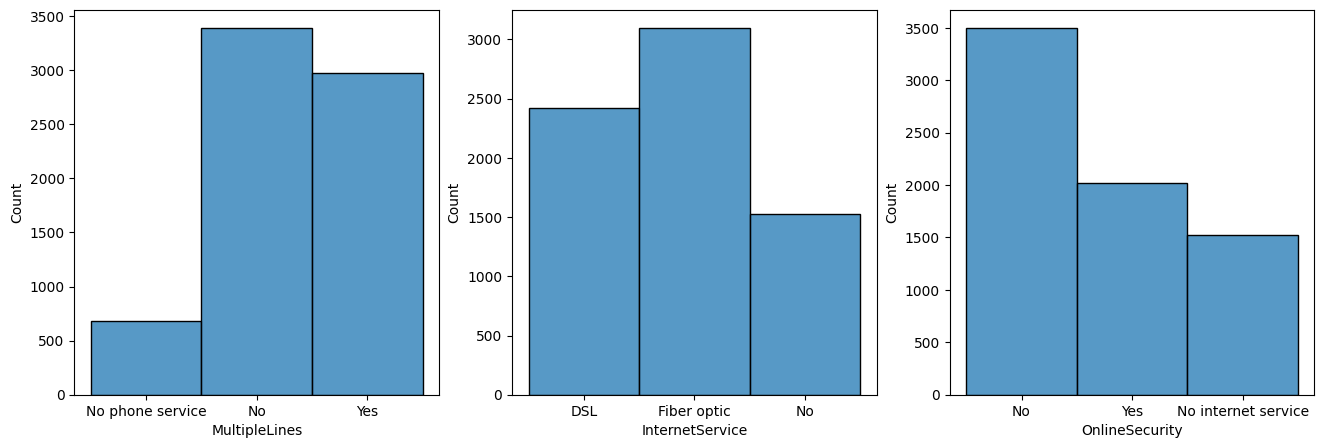

In [461]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['MultipleLines'], ax=axes[0])
sns.histplot(df['InternetService'], ax=axes[1])
sns.histplot(df['OnlineSecurity'], ax=axes[2]);

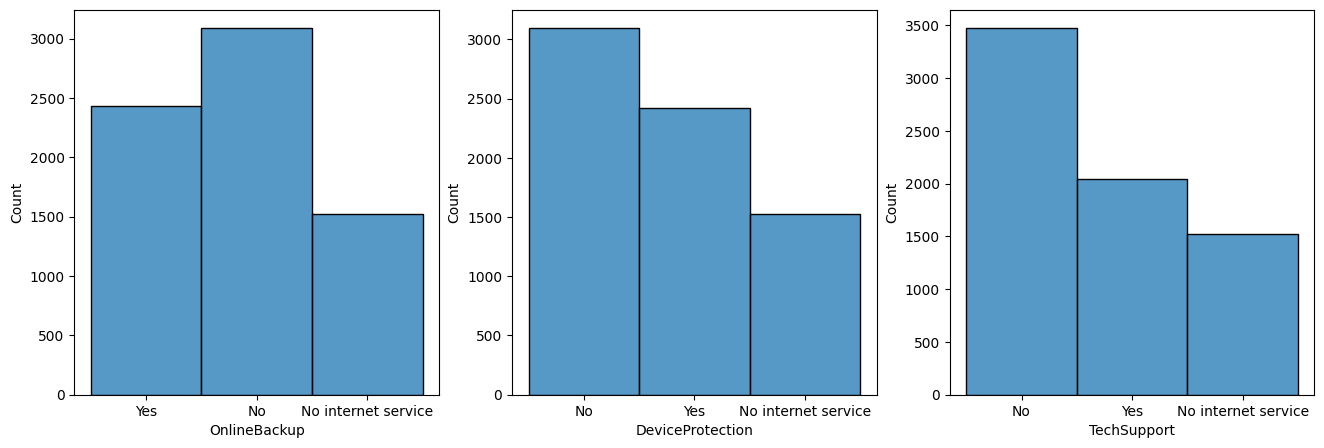

In [462]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['OnlineBackup'], ax=axes[0])
sns.histplot(df['DeviceProtection'], ax=axes[1])
sns.histplot(df['TechSupport'], ax=axes[2]);

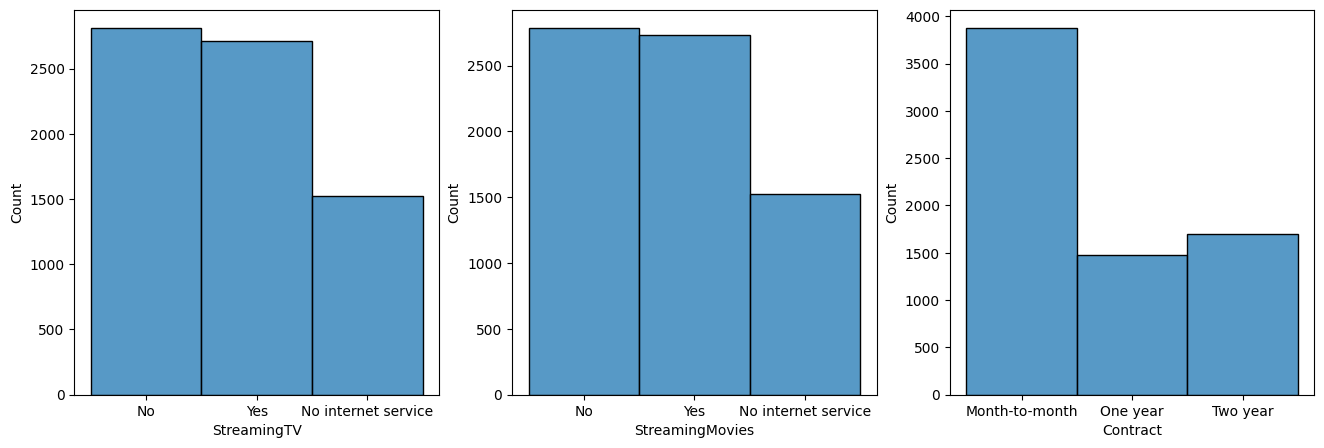

In [463]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['StreamingTV'], ax=axes[0])
sns.histplot(df['StreamingMovies'], ax=axes[1])
sns.histplot(df['Contract'], ax=axes[2]);

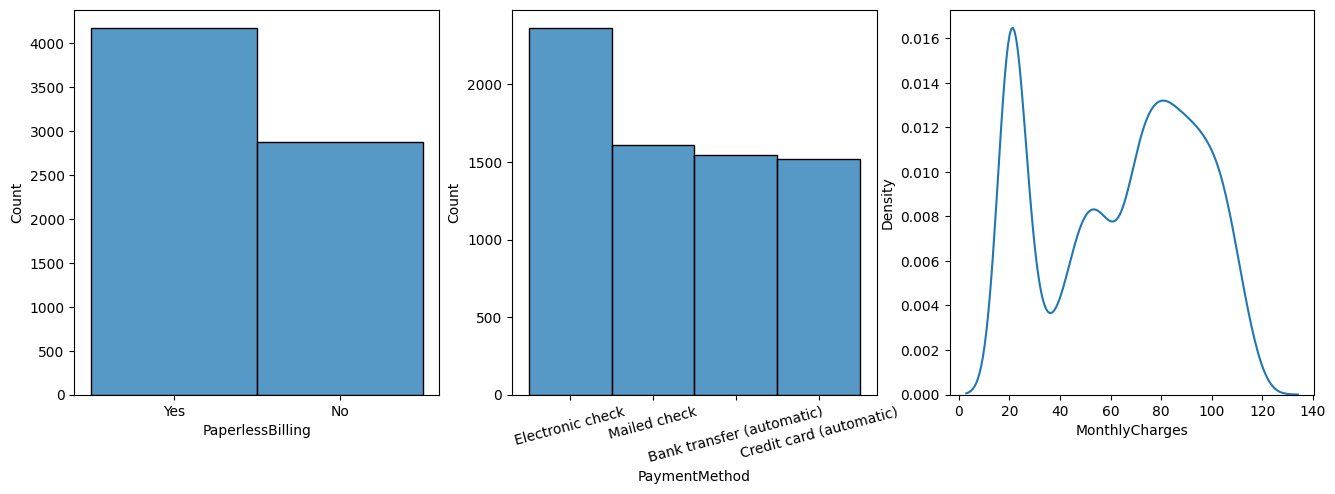

In [464]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['PaperlessBilling'], ax=axes[0])
sns.histplot(df['PaymentMethod'], ax=axes[1])
axes[1].tick_params(axis='x', rotation=15)
sns.kdeplot(df['MonthlyCharges'], ax=axes[2]);

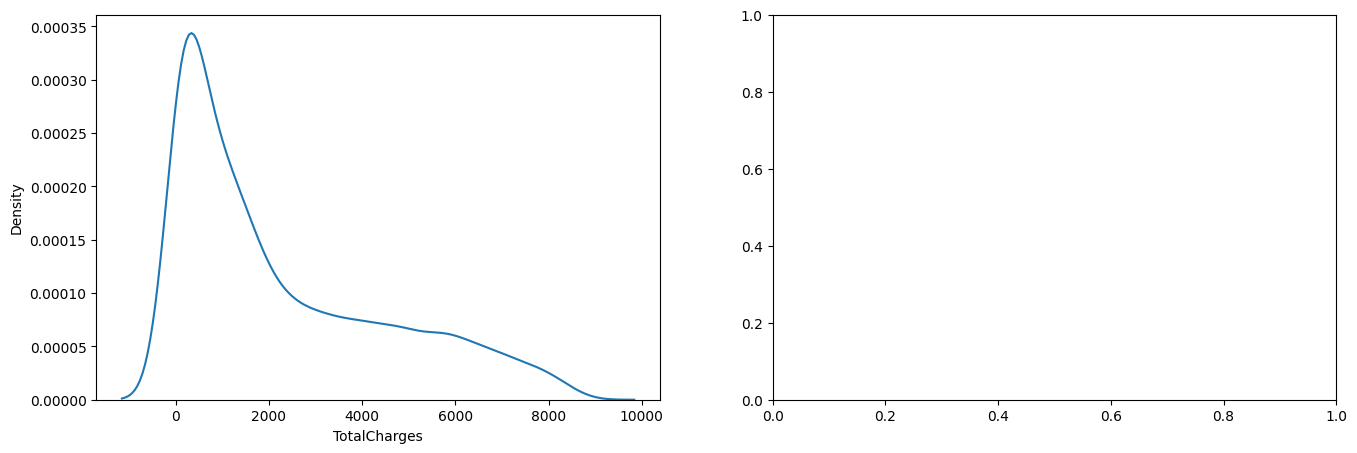

In [465]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.kdeplot(df['TotalCharges'], ax= axes[0]);

Conclusions:
- From the graphic tenure we see that most of the clients leave within the first year
- StreaminTV and StreamingMovies have almost the same distribution, so it seems that the column is redundant

Actions:
- Tenure, MonthlyCharges and TotalCharges is not normally distributed and symmetric, we will have to transform the data of this column 
- We could simplify PaymentMethod values to 'automatic' and 'non automatic'



In [466]:
from scipy.stats import shapiro
from scipy.stats import skew

# much below the significance level (0.05) is not considered a normal distribution.
print("Saphiro:", shapiro(df.tenure).pvalue)
print("Saphiro:", shapiro(df.MonthlyCharges.values).pvalue)
print("Saphiro:", shapiro(df.TotalCharges).pvalue)

# To check the asymmetry of a variable we can always calculate its skew value
# 0 if symmetrical, >0 tail to the right, <0 tail to the left


print("Asymmetry:", skew(df.tenure))
print("Asymmetry:", skew(df.MonthlyCharges))
print("Asymmetry:", skew(np.log(df.TotalCharges)))

Saphiro: 0.0
Saphiro: 0.0
Saphiro: 0.0
Asymmetry: 0.2394887299846216
Asymmetry: -0.2204774644391769
Asymmetry: nan


c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\scipy\stats\_stats_py.py:954: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


In [467]:
payment = {'Electronic check':'Non automatic', 'Mailed check':'Non automatic', 'Bank transfer (automatic)':'Automatic', 'Credit card (automatic)': 'Automatic'}
df['PaymentMethod'] = df['PaymentMethod'].map(payment)

<Axes: xlabel='PaymentMethod', ylabel='Count'>

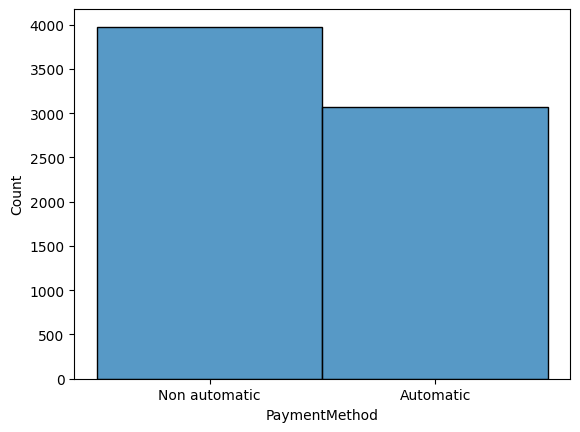

In [468]:
sns.histplot(df['PaymentMethod'])

<h3> 4. Bivariate analysis

Now , lets take a look at all the variables with the target

In [469]:
for columna in df.columns:
    conteo = df[columna].value_counts()
    print(f"Value counts para la columna '{columna}':\n{conteo}\n")

Value counts para la columna 'customerID':
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Value counts para la columna 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64

Value counts para la columna 'SeniorCitizen':
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Value counts para la columna 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Value counts para la columna 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Value counts para la columna 'tenure':
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Value counts para la columna 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Value count

Let's plot how the target is distributed in every column

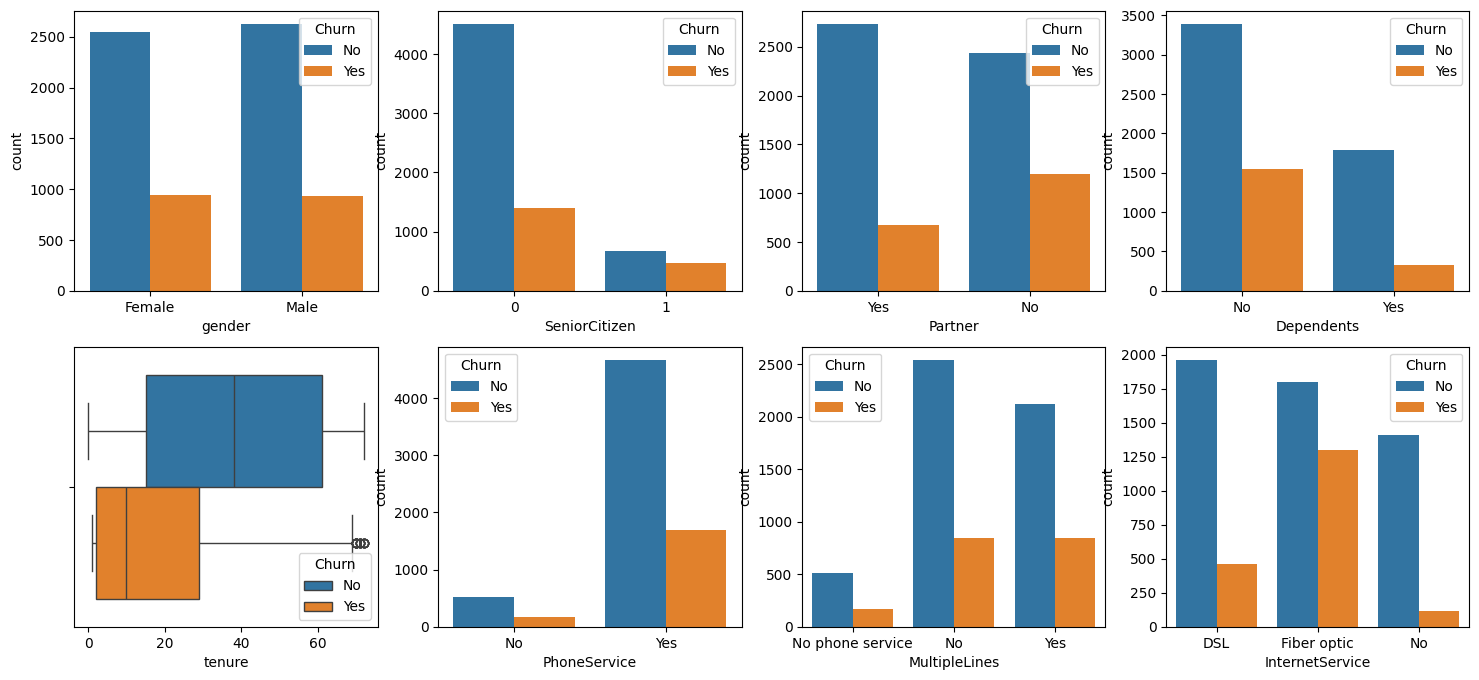

In [470]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 4, 1)
sns.countplot(x='gender', hue='Churn', data=df)
plt.subplot(2, 4, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.subplot(2, 4, 3)
sns.countplot(x='Partner', hue='Churn', data=df)
plt.subplot(2, 4, 4)
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='tenure', hue='Churn', data=df)
plt.subplot(2, 4, 6)
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.subplot(2, 4, 7)
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.subplot(2, 4, 8)
sns.countplot(x='InternetService', hue='Churn', data=df);

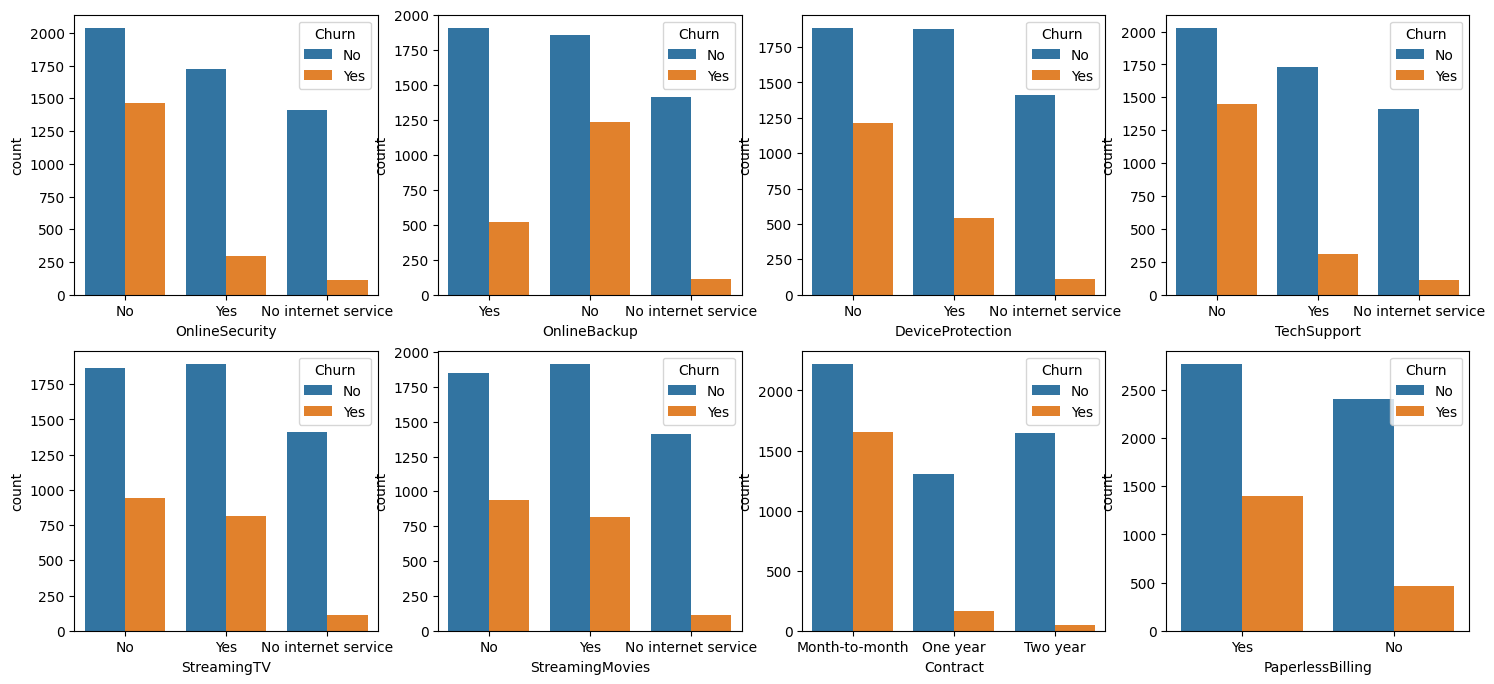

In [471]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 4, 1)
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.subplot(2, 4, 2)
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.subplot(2, 4, 3)
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.subplot(2, 4, 4)
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.subplot(2, 4, 5)
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.subplot(2, 4, 6)
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.subplot(2, 4, 7)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.subplot(2, 4, 8)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df);


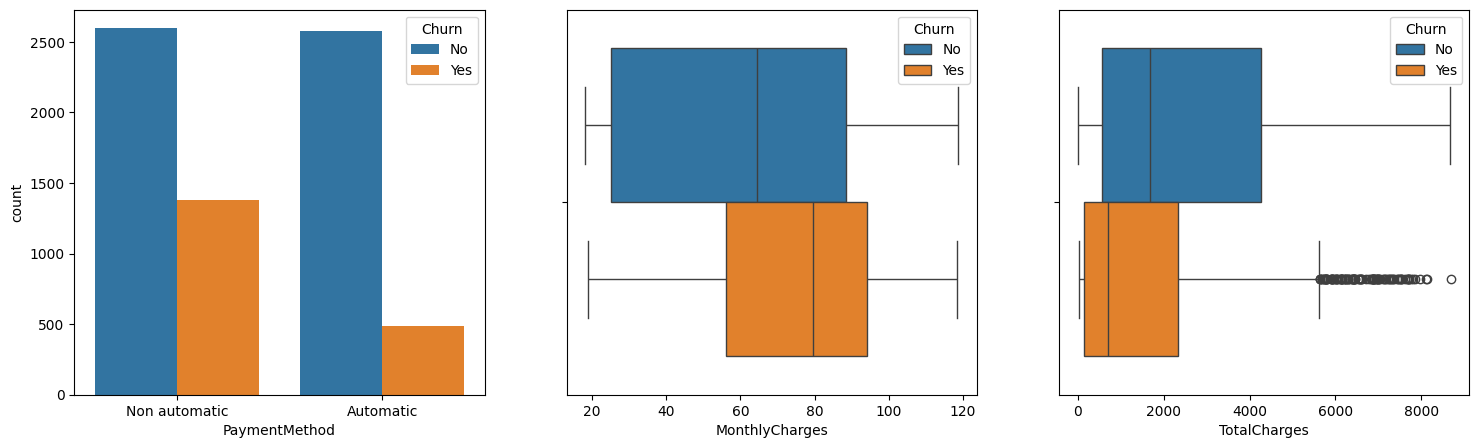

In [472]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.subplot(1, 3, 2)
sns.boxplot(x='MonthlyCharges', hue='Churn', data=df)
plt.subplot(1, 3, 3)
sns.boxplot(x='TotalCharges', hue='Churn', data=df);


In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

<h5> Correlation between variables and Churn

C:\Users\lour2\AppData\Local\Temp\ipykernel_4928\911243926.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values, palette = 'coolwarm')


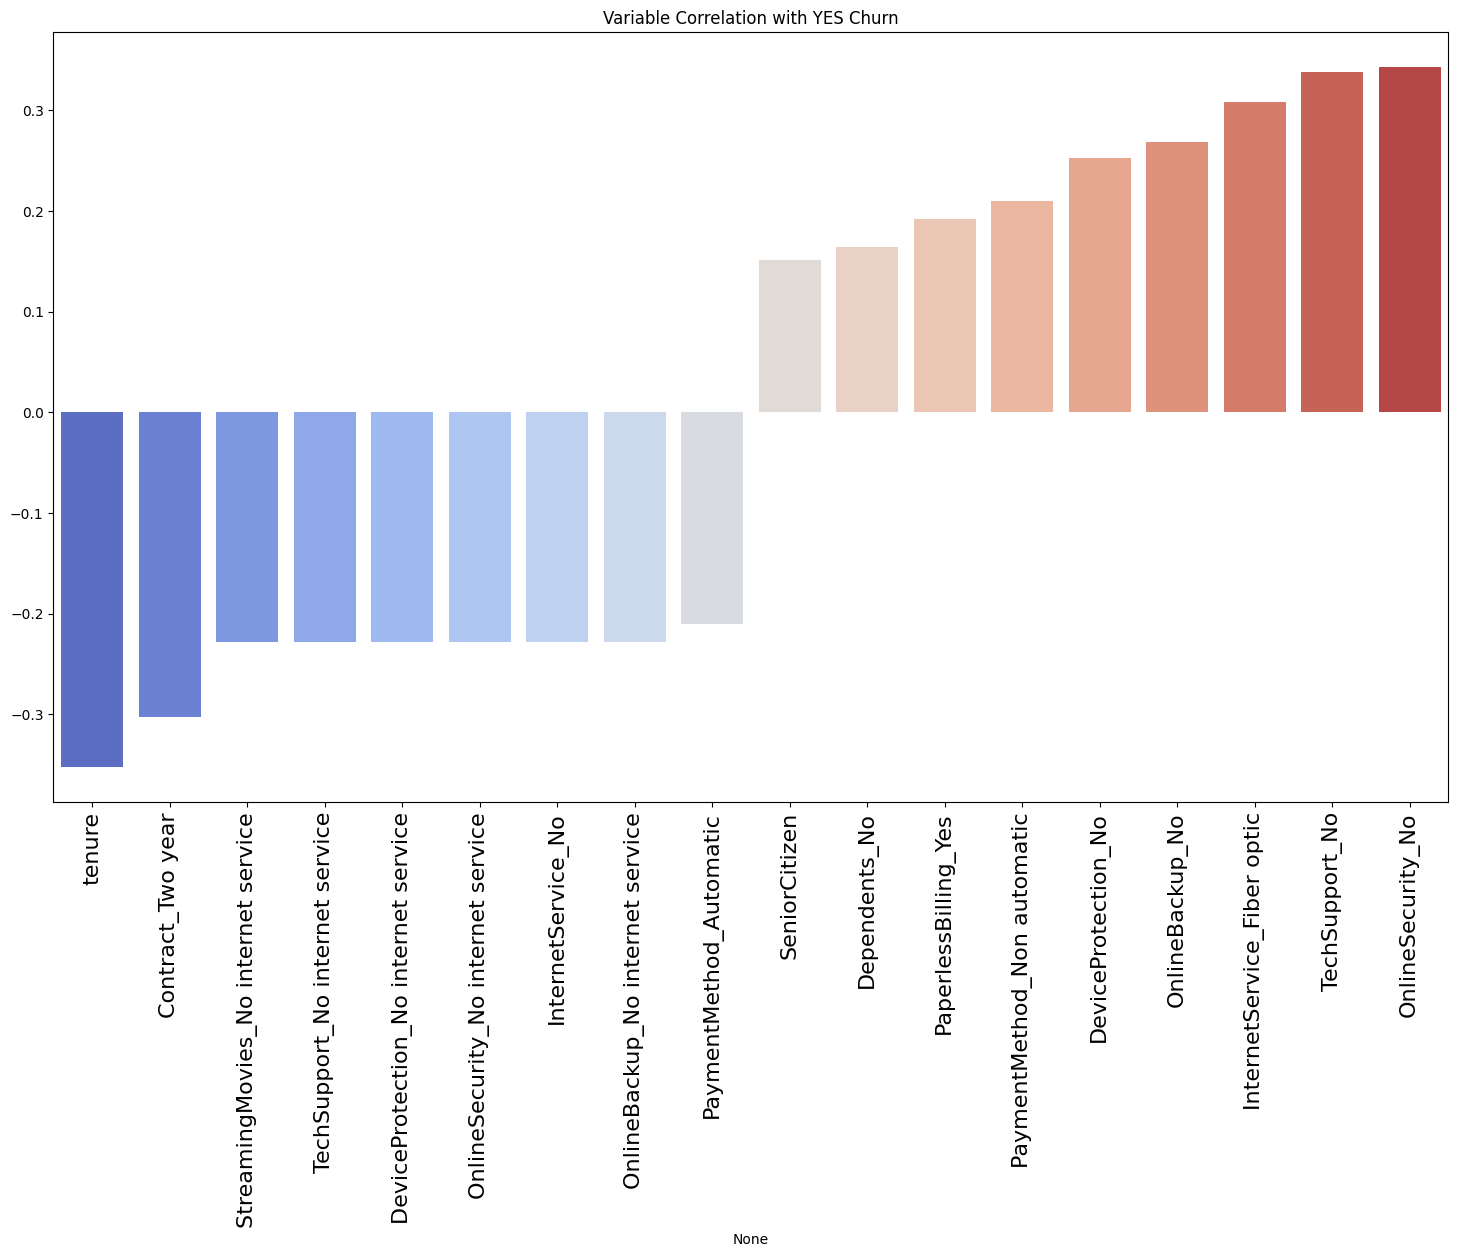

In [474]:
corr = pd.get_dummies(df[['tenure','SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
       'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

corr['Churn_Yes'].sort_values()

corr_yes_churn = corr['Churn_Yes'].sort_values().iloc[list(range(1,10)) + list(range(27, 36))]

plt.figure(figsize = (18,10))
plt.title("Variable Correlation with YES Churn")
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values, palette = 'coolwarm')
plt.xticks(rotation=90, fontsize=16);

Conclusions:
- There might be outliers in TotalCharges column
- Some columns , such us customerId, gender have no relevant information
- StreamingTv is very equal to StreamingMovies so it does not provide extra information

Actions:

Outliers<br>
- TotalCharges has a lot of values far from the average

In [475]:
df.loc[:,['TotalCharges','tenure']].sort_values(by = 'TotalCharges')
# They correspond to the clients who have been in the company longer, so the are not outliers

,TotalCharges,tenure
3826,0.00,0
5218,0.00,0
4380,0.00,0
753,0.00,0
488,0.00,0
...,...,...
2187,8564.75,71
5347,8594.40,72
6768,8670.10,72
4586,8672.45,72


In [476]:
# we check that people with 0 TotalCharges are in the first month, so we replace 0 values for 'MonthlyCharges'
mask = df[df['TotalCharges'] == 0]
df.loc[mask.index, 'TotalCharges'] = df.loc[mask.index, 'MonthlyCharges']

Drop columns <br>
Based on the conclusions, we decide to drop:
- 'customerId' due to its high cardinality
- 'gender': churn is equally distributed by gender, so it does not help to predict
- 'StreamingTV' and 'StreamingMovies' are practically identical



In [477]:
df = df.drop(['customerID', 'gender', 'StreamingTV'], axis = 1)


<h3>5. Encodings

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64
 17  

In [479]:
df = pd.concat([df, pd.get_dummies(df.Partner, prefix='Partner') ], axis=1).drop('Partner', axis =1)
#df.Partner = df.Partner.apply(lambda x : 0 if x == 'No' else 1 )

df = pd.concat([df, pd.get_dummies(df.Dependents, prefix='Dependents') ], axis=1).drop('Dependents', axis =1)
#df.Dependents = df.Dependents.apply(lambda x : 0 if x == 'No' else 1)

df = pd.concat([df, pd.get_dummies(df.PhoneService, prefix='PhoneService') ], axis=1).drop('PhoneService', axis =1)
#df.PhoneService = df.PhoneService.apply(lambda x : 0 if x == 'No' else 1)

df = pd.concat([df, pd.get_dummies(df.MultipleLines, prefix='MultipleLines') ], axis=1).drop('MultipleLines', axis =1)
#df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 1, 'Yes': 2})

df = pd.concat([df, pd.get_dummies(df.InternetService, prefix='InternetService') ], axis=1).drop('InternetService', axis =1)
#df.InternetService = df.InternetService.map({'No': 0, 'DSL': 1, 'Fiber optic': 2})

df = pd.concat([df, pd.get_dummies(df.OnlineSecurity, prefix='OnlineSecurity') ], axis=1).drop('OnlineSecurity', axis =1)
#df.OnlineSecurity = df.OnlineSecurity.map({'No internet service': 0, 'No': 1, 'Yes': 2})

df = pd.concat([df, pd.get_dummies(df.OnlineBackup, prefix='OnlineBackup') ], axis=1).drop('OnlineBackup', axis =1)
#df.OnlineBackup = df.OnlineBackup.map({'No internet service': 0, 'No': 1, 'Yes': 2})

df = pd.concat([df, pd.get_dummies(df.DeviceProtection, prefix='DeviceProtection') ], axis=1).drop('DeviceProtection', axis =1)
#df.DeviceProtection = df.DeviceProtection.map({'No internet service': 0, 'No': 1, 'Yes': 2})

df = pd.concat([df, pd.get_dummies(df.TechSupport, prefix='TechSupport') ], axis=1).drop('TechSupport', axis =1)
#df.TechSupport = df.TechSupport.map({'No internet service': 0, 'No': 1, 'Yes': 2})

df = pd.concat([df, pd.get_dummies(df.StreamingMovies, prefix='StreamingMovies') ], axis=1).drop('StreamingMovies', axis =1)
#df.StreamingMovies = df.StreamingMovies.map({'No internet service': 0, 'No': 1, 'Yes': 2})

df = pd.concat([df, pd.get_dummies(df.Contract, prefix='Contract') ], axis=1).drop('Contract', axis =1)
#df.Contract = df.Contract.map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

df = pd.concat([df, pd.get_dummies(df.PaperlessBilling, prefix='PaperlessBilling') ], axis=1).drop('PaperlessBilling', axis =1)
#df.PaperlessBilling = df.PaperlessBilling.map(lambda x : 0 if x == 'No' else 1)

df = pd.concat([df, pd.get_dummies(df.PaymentMethod, prefix='PaymentMethod') ], axis=1).drop('PaymentMethod', axis =1)
#df.PaymentMethod = df.PaymentMethod.map(lambda x : 0 if x == 'Non automatic' else 1)

df.Churn = df.Churn.map(lambda x : 0 if x == 'No' else 1)


In [480]:
df = df.drop(['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingMovies_No internet service' ], axis = 1)

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SeniorCitizen                7043 non-null   int64  
 1   tenure                       7043 non-null   int64  
 2   MonthlyCharges               7043 non-null   float64
 3   TotalCharges                 7043 non-null   float64
 4   Churn                        7043 non-null   int64  
 5   Partner_No                   7043 non-null   bool   
 6   Partner_Yes                  7043 non-null   bool   
 7   Dependents_No                7043 non-null   bool   
 8   Dependents_Yes               7043 non-null   bool   
 9   PhoneService_No              7043 non-null   bool   
 10  PhoneService_Yes             7043 non-null   bool   
 11  MultipleLines_No             7043 non-null   bool   
 12  MultipleLines_Yes            7043 non-null   bool   
 13  InternetService_DSL    

<h3> Correlation matrix <br>
<h5>Correlation between features

In [482]:
correlation_matrix = df.corr()

# Filtering columns with low correlation to 'Churn' (< 0.2)
corr_filtro = correlation_matrix[abs(correlation_matrix) > 0.15]

# Fill with NaN those cells that do not meet the correlation criteria
corr_filtro = corr_filtro.fillna(0)

In [483]:
# Drop columns with low correlation to 'Churn' (< 0.2)
drop_columns = corr_filtro[corr_filtro['Churn'] == 0].index
df = df.drop(columns=drop_columns)

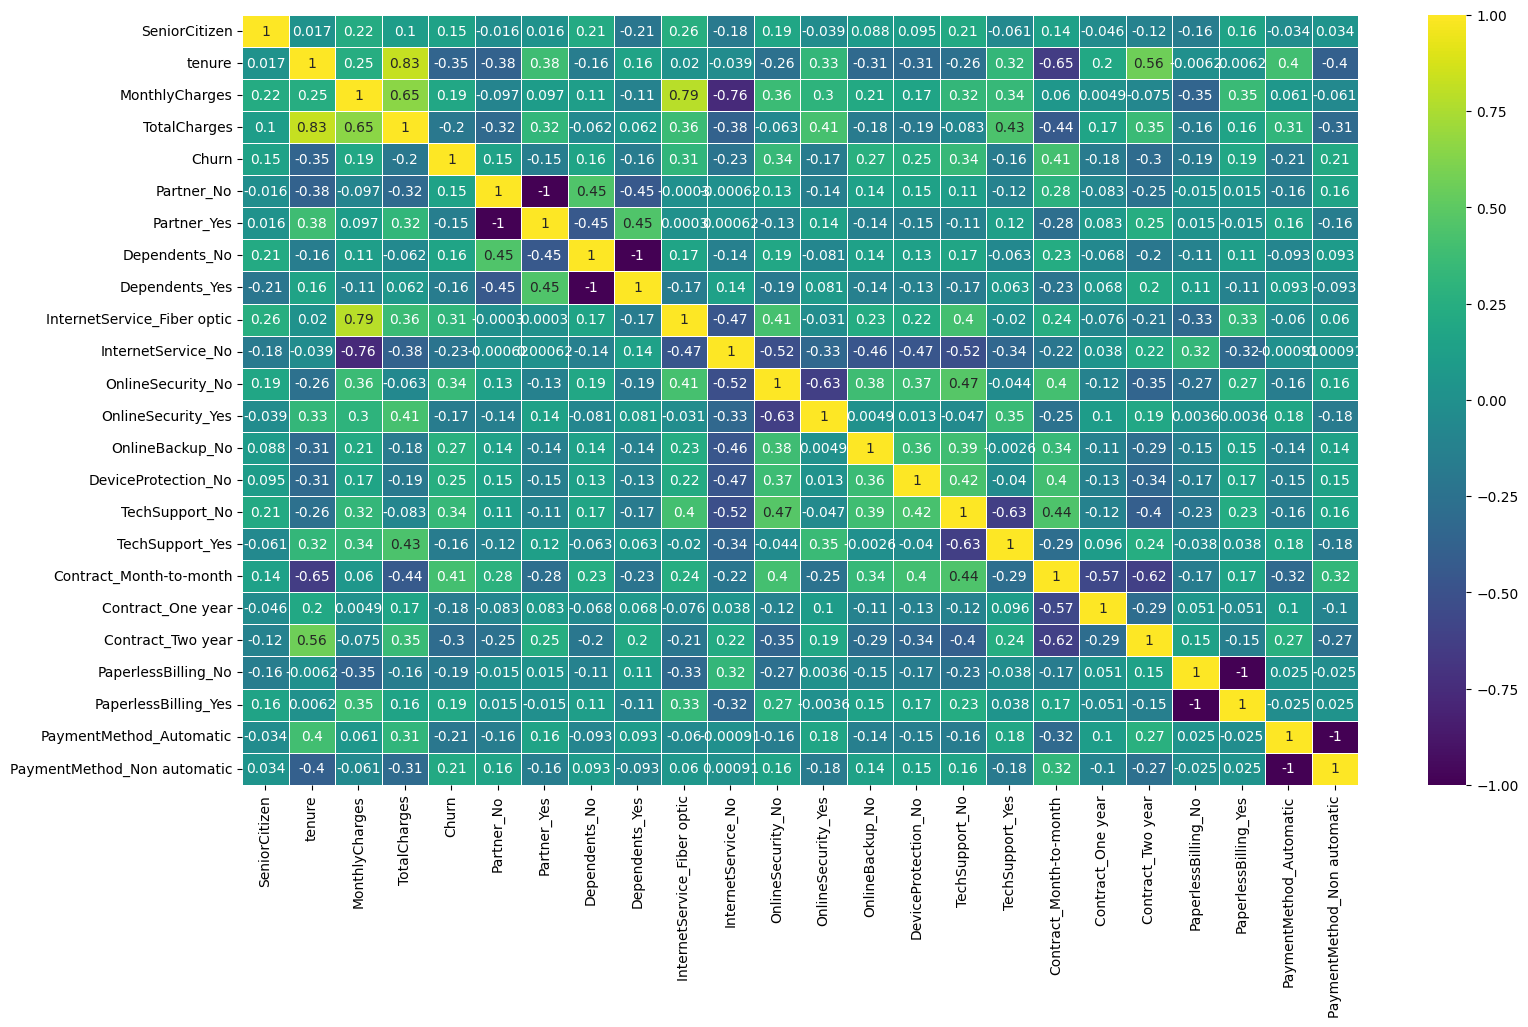

In [484]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),
            cmap='viridis',
            annot=True,
             linewidths=.5);

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SeniorCitizen                7043 non-null   int64  
 1   tenure                       7043 non-null   int64  
 2   MonthlyCharges               7043 non-null   float64
 3   TotalCharges                 7043 non-null   float64
 4   Churn                        7043 non-null   int64  
 5   Partner_No                   7043 non-null   bool   
 6   Partner_Yes                  7043 non-null   bool   
 7   Dependents_No                7043 non-null   bool   
 8   Dependents_Yes               7043 non-null   bool   
 9   InternetService_Fiber optic  7043 non-null   bool   
 10  InternetService_No           7043 non-null   bool   
 11  OnlineSecurity_No            7043 non-null   bool   
 12  OnlineSecurity_Yes           7043 non-null   bool   
 13  OnlineBackup_No        

In [486]:
#ruta = 'C:\Users\lour2\Desktop\LOURDES\data science\Proyecto Machine Learning\data\processed'
df.to_csv(r'C:\Users\lour2\Desktop\LOURDES\data science\Proyecto Machine Learning\data\processed\model_data.csv', index = False)

<h3> 6. Model development

<h3> Split values in train and test

In [487]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle= True)

<h3> Normalize values

In [488]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train1)
X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

Smote technique to balance the target

In [489]:
seed = 40
'''from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
smo = SMOTE(sampling_strategy="auto", random_state = seed)
X_train, y_train = smo.fit_resample(X_train,y_train)'''

'from imblearn import over_sampling\nfrom imblearn.over_sampling import SMOTE\nsmo = SMOTE(sampling_strategy="auto", random_state = seed)\nX_train, y_train = smo.fit_resample(X_train,y_train)'

<h4> Choosing the best model

In [490]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score



In [491]:
rfc = RandomForestClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()
ada = AdaBoostClassifier()
lr = LogisticRegression()

In [492]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

rfc.fit(X_train, y_train)
xgb.fit(X_train, y_train)
cat.fit(X_train, y_train)
ada.fit(X_train, y_train)
lr.fit(X_train, y_train)


print('recall_rfc', recall_score(y_test, rfc.predict(X_test)))
print('precision_rfc',precision_score(y_test, rfc.predict(X_test)))
print('precision_rfc',accuracy_score(y_test, rfc.predict(X_test)))
print('   ')
print('recall_xgb',recall_score(y_test, xgb.predict(X_test)))
print('precision_xgb',precision_score(y_test, xgb.predict(X_test)))
print('precision_xgb',accuracy_score(y_test, xgb.predict(X_test)))
print('   ')
print('recall_cat',recall_score(y_test, cat.predict(X_test)))
print('precision_cat',precision_score(y_test, cat.predict(X_test)))
print('precision_cat',accuracy_score(y_test, cat.predict(X_test)))
print('   ')
print('recall_ada',recall_score(y_test, ada.predict(X_test)))
print('precision_ada',precision_score(y_test, ada.predict(X_test)))
print('precision_ada',accuracy_score(y_test, ada.predict(X_test)))
print('   ')
print('recall_lr',recall_score(y_test, lr.predict(X_test)))
print('precision_lr',precision_score(y_test, lr.predict(X_test)))
print('accuracy_lr',accuracy_score(y_test, lr.predict(X_test)))

Learning rate set to 0.02036
0:	learn: 0.6786120	total: 3.89ms	remaining: 3.88s
1:	learn: 0.6651524	total: 8.28ms	remaining: 4.13s
2:	learn: 0.6527026	total: 12.5ms	remaining: 4.15s
3:	learn: 0.6414348	total: 16.9ms	remaining: 4.22s
4:	learn: 0.6309256	total: 20.9ms	remaining: 4.15s
5:	learn: 0.6200575	total: 24.8ms	remaining: 4.11s
6:	learn: 0.6089846	total: 28.6ms	remaining: 4.05s
7:	learn: 0.5993757	total: 33ms	remaining: 4.1s
8:	learn: 0.5906448	total: 37.1ms	remaining: 4.08s
9:	learn: 0.5836176	total: 39.6ms	remaining: 3.92s
10:	learn: 0.5757499	total: 43.2ms	remaining: 3.89s
11:	learn: 0.5679671	total: 48.2ms	remaining: 3.97s
12:	learn: 0.5604389	total: 52.2ms	remaining: 3.96s
13:	learn: 0.5532246	total: 56.2ms	remaining: 3.96s
14:	learn: 0.5464501	total: 60.1ms	remaining: 3.94s
15:	learn: 0.5401912	total: 64.5ms	remaining: 3.97s
16:	learn: 0.5346360	total: 68.5ms	remaining: 3.96s
17:	learn: 0.5290813	total: 72.4ms	remaining: 3.95s
18:	learn: 0.5243377	total: 76.4ms	remaining: 3.

Let's check if we have overfitting

In [493]:
print(recall_score(y_train, lr.predict(X_train)))
print(precision_score(y_train, lr.predict(X_train)))
print(accuracy_score(y_train, lr.predict(X_train)))


0.5281853281853282
0.6477272727272727
0.8006085192697768


Scores in train and test are very similar so it seems that we are not overfitting

#### Best model is Logistic Regression with 0.85 recall in test
#### Let's see if we can improve the score adjusting the parameters


<h3> Logistic Regression

In [494]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

lr_param = {             
            'max_iter': [38,40,60,80],
            'C': [0.2, 0.5, 0.7 ,1],
            'tol': [0.0001, 0.00008],
            'warm_start' : [False, True]
            }


grid = GridSearchCV(lr, lr_param, scoring='recall', cv =5)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.5, 'max_iter': 38, 'tol': 0.0001, 'warm_start': False}

### Feature importance

In [495]:
log = grid.best_estimator_
coeficientes = log.coef_[0]
data = {'Importance': coeficientes, 'Column': X.columns}
pd.DataFrame(data).sort_values(by='Importance', ascending = False)

,Importance,Column
3,0.574486,TotalCharges
16,0.324860,Contract_Month-to-month
8,0.254757,InternetService_Fiber optic
2,0.171358,MonthlyCharges
10,0.161166,OnlineSecurity_No
14,0.126870,TechSupport_No
12,0.110572,OnlineBackup_No
0,0.092063,SeniorCitizen
20,0.088485,PaperlessBilling_Yes
22,0.068214,PaymentMethod_Non automatic


## Test score
It is interesting to see both scores (recall and precision) because although I want to focus on detecting as many Churns as possible (recall), I don't want my model to be highly biased on that. Predicting all customers to churn gives a recall of 1 but it is not an accurate model and can lead to wrong decisions


In [496]:

log = log.fit(X_train, y_train)
print(recall_score(y_test, log.predict(X_test)))
print(precision_score(y_test, log.predict(X_test)))
print(accuracy_score(y_test, log.predict(X_test)))



0.5557491289198606
0.6673640167364017
0.804070042593469


In [497]:
# overfitting? score in test and train is similar so it seems that is not overfitted
print(recall_score(y_train, log.predict(X_train)))
print(precision_score(y_train, log.predict(X_train)))
print(accuracy_score(y_train, log.predict(X_train)))



0.5274131274131274
0.6486229819563153
0.8008113590263691


#### Predictions

In [498]:
predictions = log.predict(X_test)
predictions

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Confusion matrix

I'm going to focus on recall score, to make sure I detect as many Churns as possible <br>
There is a total of 574 people who really Churn and I: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - correctly detected 488 (85% right) but <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - uncorrectly classified 464 as churn (48% of my Churn predictions are wrong) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - the overall accuracy of the model is 75% <br>
As my goal is to detect Churn in order to not loose customers, I conclude that 85% is a good rate detection <br>


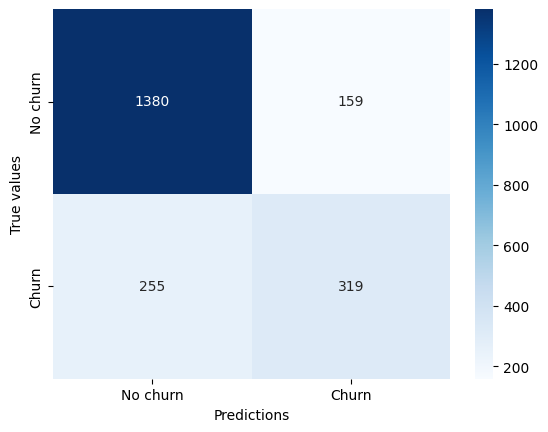

In [499]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No churn', 'Churn' ], yticklabels=['No churn', 'Churn'])
plt.xlabel('Predictions')
plt.ylabel('True values')
plt.show()

In [500]:
y_test.value_counts()

Churn
0    1539
1     574
Name: count, dtype: int64

Precision recall curve <br>
Here we can see how recall varies depending on precision and viceversa.

In [501]:
from sklearn.metrics import precision_recall_curve
y_pred_prob = log.predict_proba(X_test)
pred_prob_1 = y_pred_prob[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_prob_1)

In [502]:
df_pr_curve = pd.DataFrame(precisions[1:], columns=['precisions'])
df_pr_curve['recalls'] = recalls[1:]
df_pr_curve['thresholds'] = thresholds
df_pr_curve[1150:1200]

,precisions,recalls,thresholds
1150,0.516196,0.860627,0.242646
1151,0.516736,0.860627,0.243224
1152,0.517277,0.860627,0.243243
1153,0.517820,0.860627,0.244034
1154,0.518363,0.860627,0.244456
1155,0.518908,0.860627,0.245826
1156,0.518402,0.858885,0.247703
1157,0.518947,0.858885,0.248521
1158,0.519494,0.858885,0.249364
1159,0.520042,0.858885,0.249580


Text(0, 0.5, 'Recall')

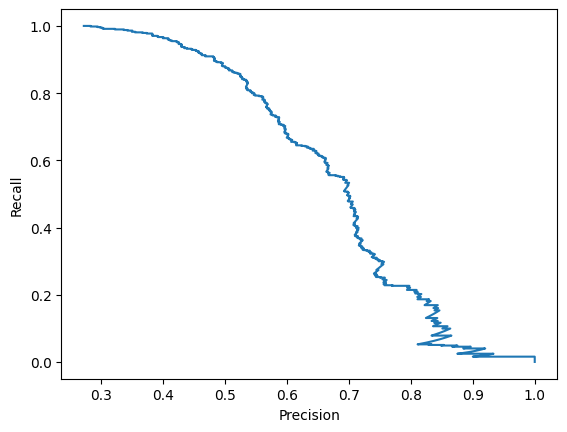

In [503]:
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")

In [513]:
predictions[y_pred_prob[:,1]>= 0.4] = 1

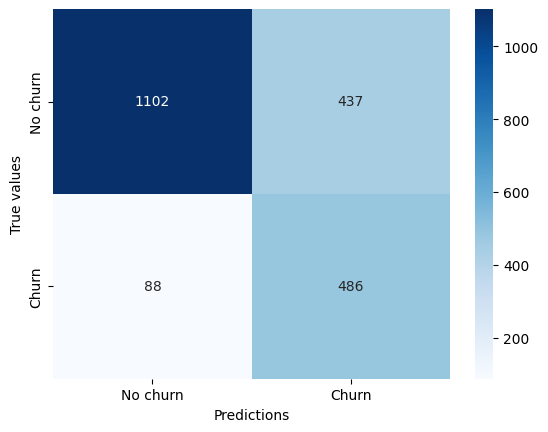

In [514]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No churn', 'Churn' ], yticklabels=['No churn', 'Churn'])
plt.xlabel('Predictions')
plt.ylabel('True values')
plt.show()

In [515]:
print(recall_score(y_test, predictions))
print(precision_score(y_test, predictions))
print(accuracy_score(y_test, predictions))


0.8466898954703833
0.5265438786565547
0.751538097491718


In [507]:
# values without changing threshold
0.5274131274131274
0.6486229819563153
0.8008113590263691

0.8008113590263691

0ther code....

In [508]:
X_train_data = pd.DataFrame(X_train)

In [509]:
X_train_data.to_csv(r'C:\Users\lour2\Desktop\LOURDES\data science\Proyecto Machine Learning\data\processed\X_train_data.csv', index = False)

In [510]:
Y_train_data = pd.DataFrame(y_train)

In [511]:
Y_train_data.to_csv(r'C:\Users\lour2\Desktop\LOURDES\data science\Proyecto Machine Learning\data\processed\Y_train_data.csv', index = False)

In [512]:
X_test_data = pd.DataFrame(X_test)